**Predicting heart-disease using machine learning model**

*   **1. Problem definition** Given clinical parameter about a patient predict whether they has heart disease or not?
*   **2. Data**  Source of data is `UCI` machine learing repository https://archive.ics.uci.edu/ml/datasets/heart+Disease
*   **3. Evaluation** When prediction accuracy of our model becomes 90% then we can say it as a good model
*   **4. Features** Atributes or column name of data table


**Features details**
1.   age - age in years
2.  sex - (1 = male; 0 = female)
3.  cp - chest pain type
  *    0: Typical angina: chest pain related decrease blood supply to the heart
  *    1: Atypical angina: chest pain not related to heart
  *    2: Non-anginal pain: typically esophageal spasms (non heart related)
  *    3: Asymptomatic: chest pain not showing signs of disease
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl
    *    serum = LDL + HDL + .2 * triglycerides
    *    above 200 is cause for concern
6.  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   *  '>126' mg/dL signals diabetes
7.  restecg - resting electrocardiographic results
    *   0: Nothing to note
    *   1: ST-T Wave abnormality
        *   can range from mild symptoms to severe problems
        *   signals non-normal heart beat
    *   2: Possible or definite left ventricular hypertrophy
        *   Enlarged heart's main pumping chamber
8.  thalach - maximum heart rate achieved
9.  exang - exercise induced angina (1 = yes; 0 = no)
10.  oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    *    0: Upsloping: better heart rate with excercise (uncommon)
    *    1: Flatsloping: minimal change (typical healthy heart)
    *    2: Downslopins: signs of unhealthy heart
12.  ca - number of major vessels (0-3) colored by flourosopy
    *    colored vessel means the doctor can see the blood passing through
    *    the more blood movement the better (no clots)
13. thal - thalium stress result
    *    1,3: normal
    *    6: fixed defect: used to be defect but ok now
    *    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Preparing the tools**


*   we are going to use Pandas, Numpy, MatplotLib seaborn for data viewing, analytics and manipulation.
*   Scikit learn for Modelling



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Plot inside notebook
%matplotlib inline

#sk-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay #updated from (plot_roc_curve)

**Load Data**

In [2]:
heart_disease=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart-disease.csv")
heart_disease.shape

(303, 14)

In [3]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Data Expolaration**
> Goal is to know more about our data and become expert on data which you working with.
1.  What type of our problem is?
2.  what type of data we have and how will we differentiate it.
3.  What is missing from our data and how we will deal with that.
4.  Data manipulation and dealing with outliers.
5.  how can we work with features so we get more out of our data.



In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#let's check how many of each class there
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '0  Not Heart-disease, 1  Heart-disease')

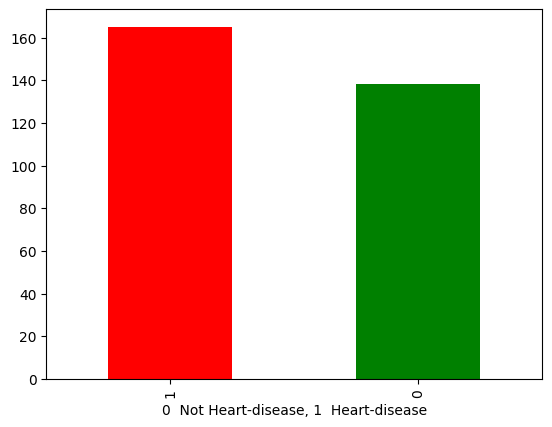

In [7]:
heart_disease["target"].value_counts().plot(kind="bar",color=["red","green"]);
plt.xlabel("0  Not Heart-disease, 1  Heart-disease")

In [8]:
# info() to know more about data type and missing values
heart_disease.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#Are there any missing values?
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Heart disease frquency accoriding to gender**

In [10]:
heart_disease["sex"].value_counts()
#(1 male, 0 female)

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare target column to sex column
pd.crosstab(heart_disease["target"],heart_disease["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Number')

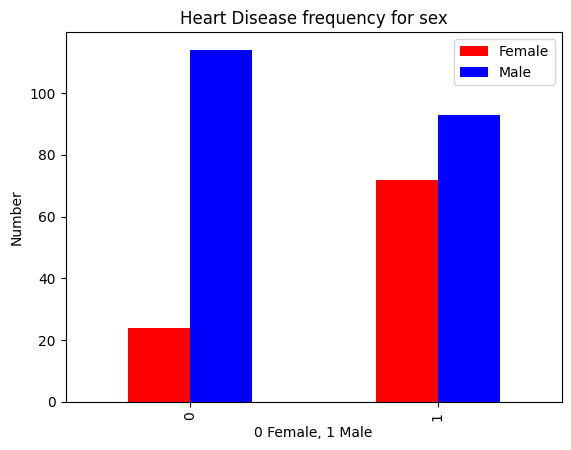

In [12]:
#Plot above data for better view
pd.crosstab(heart_disease["target"],heart_disease["sex"]).plot(kind="bar",color=["red","blue"])
plt.title("Heart Disease frequency for sex")
plt.legend(["Female","Male"])
plt.xlabel("0 Female, 1 Male")
plt.ylabel("Number")

**Age vs Max-heart rate for heart disease**

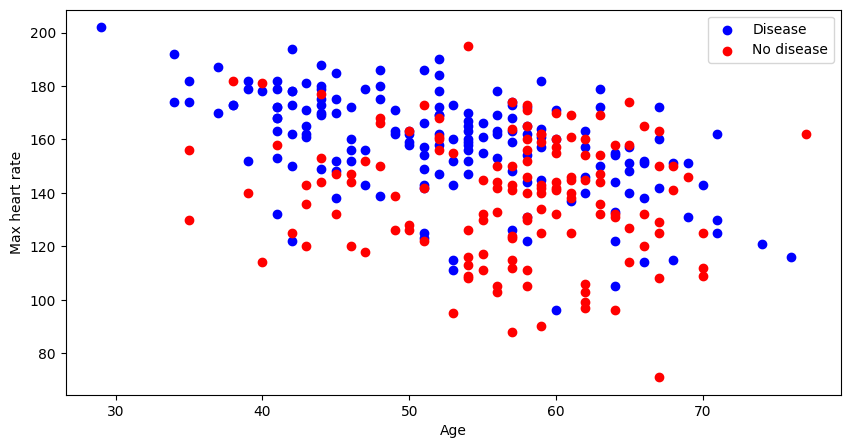

In [13]:
plt.figure(figsize=(10,5))

#plot of person having disease
plt.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],color=['blue'])

#plot of person without disease
plt.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],color=['red'])
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(['Disease','No disease'])

<Axes: ylabel='Frequency'>

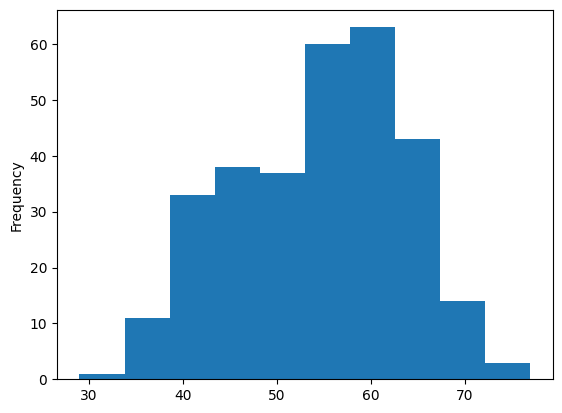

In [14]:
heart_disease["age"].plot.hist()

In [15]:
(heart_disease["thalach"]>=140).value_counts()#just a blind classification to see the max heart-rate person have disease
(heart_disease[(heart_disease["thalach"]>=160)].target==1).value_counts()

True     90
False    29
Name: target, dtype: int64

**Heart disease depending on type of chest pain (cp)**
3.  cp - chest pain type
  *    0: Typical angina: chest pain related decrease blood supply to the heart
  *    1: Atypical angina: chest pain not related to heart
  *    2: Non-anginal pain: typically esophageal spasms (non heart related)
  *    3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(heart_disease.cp,heart_disease.target)
#seems confusing according to definition of cp but it's ok

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


**Correlation Matrix**

In [17]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


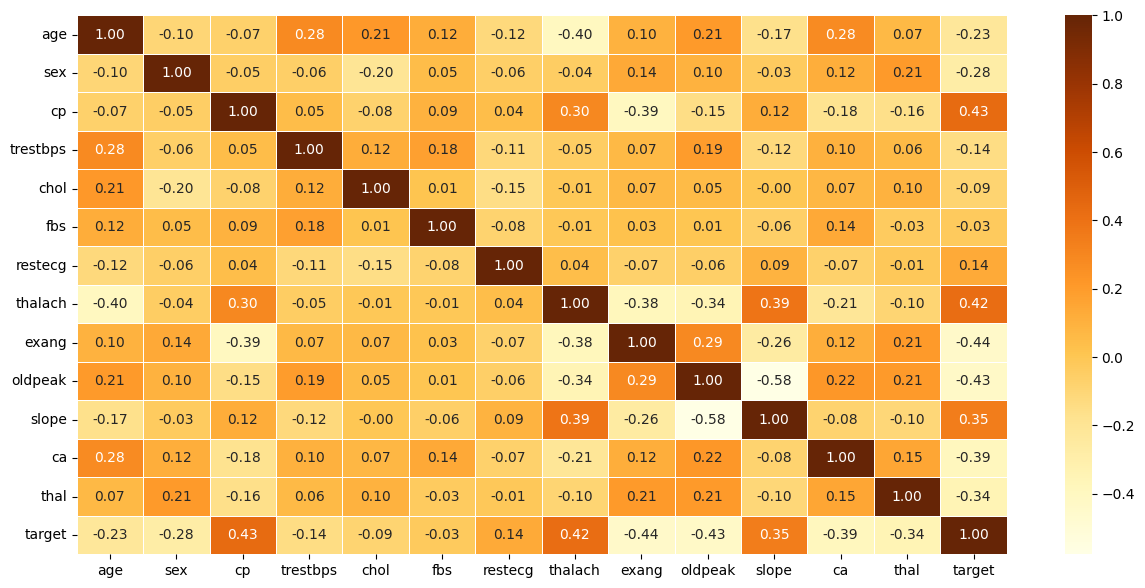

In [18]:
corr_m=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,7))
ax=sns.heatmap(corr_m,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlOrBr")

**Modelling**

In [58]:
#creating X and Y
X=heart_disease.drop("target",axis=1)
Y=heart_disease.target

#set random seed
np.random.seed(17)
#Spliting data into two part trainin data and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)



1.  Now our data have two part train and test data, now let's think about building.
2.  We'll train on training data.
3.  we'll test it on test data
*  we are going to try three model here
    1. K-Nearest-Neighours classifier
    2. Logistic regression
    3. Random Forest classifier

**Create a function `Evaluate_model` for calculation of accuracy of our model**

In [59]:
model_Use={
    "Logistic-Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}
def Evaluate_model(model_Use,x_train,x_test,y_train,y_test):
    #Setup seed
    np.random.seed(110)
    accuracy={}
    for Name,Model in model_Use.items():
        Model.fit(x_train,y_train)#Fitting data
        accuracy[Name]=Model.score(x_test,y_test)
        # print(f"Accuracy of {Name} is {accuracy[Name]}")
    return accuracy;

In [60]:
model_score= Evaluate_model(model_Use,x_train,x_test,y_train,y_test)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic-Regression': 0.819672131147541,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

**MODEL COMPARISON**

<Axes: >

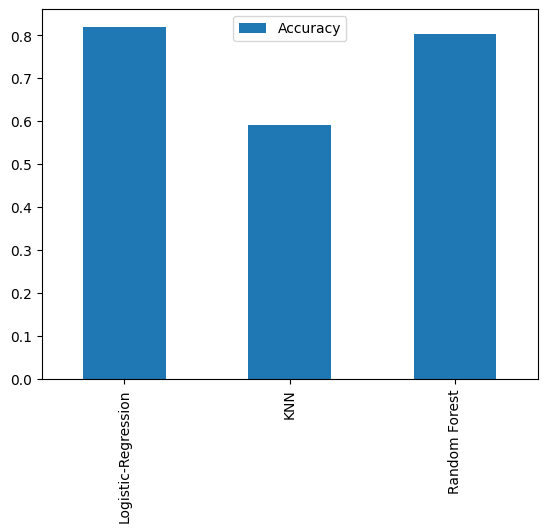

In [61]:
model_cmp= pd.DataFrame(model_score,index=["Accuracy"])
model_cmp.T.plot.bar()

*  we got our model's first prediction, this is baseline for our model, we know best is yet to come

**HyperParameter Tuning**(by hand)

In [65]:
#knn model
train_score=[]
test_score=[]
np.random.seed(17)
#model call
knn_model=KNeighborsClassifier();
for i in range(1,25):
    #set parameter
    knn_model.set_params(n_neighbors=i)
    #fit the model
    knn_model.fit(x_train,y_train)
    #check score on train and test data
    train_score.append(knn_model.score(x_train,y_train))
    test_score.append(knn_model.score(x_test,y_test))
test_score,train_score

([0.5573770491803278,
  0.5573770491803278,
  0.6557377049180327,
  0.5409836065573771,
  0.5901639344262295,
  0.6229508196721312,
  0.6065573770491803,
  0.6065573770491803,
  0.6065573770491803,
  0.6229508196721312,
  0.6229508196721312,
  0.6229508196721312,
  0.6229508196721312,
  0.6557377049180327,
  0.6229508196721312,
  0.6229508196721312,
  0.6229508196721312,
  0.6229508196721312,
  0.6557377049180327,
  0.6065573770491803,
  0.6229508196721312,
  0.5901639344262295,
  0.5901639344262295,
  0.5901639344262295],
 [1.0,
  0.8223140495867769,
  0.7933884297520661,
  0.768595041322314,
  0.7851239669421488,
  0.7644628099173554,
  0.7603305785123967,
  0.7479338842975206,
  0.7396694214876033,
  0.7479338842975206,
  0.71900826446281,
  0.7231404958677686,
  0.7272727272727273,
  0.7355371900826446,
  0.7272727272727273,
  0.71900826446281,
  0.7272727272727273,
  0.7066115702479339,
  0.7148760330578512,
  0.7066115702479339,
  0.7355371900826446,
  0.7107438016528925,
  0.723

Maximum accuracy on test_score is 65.57 %


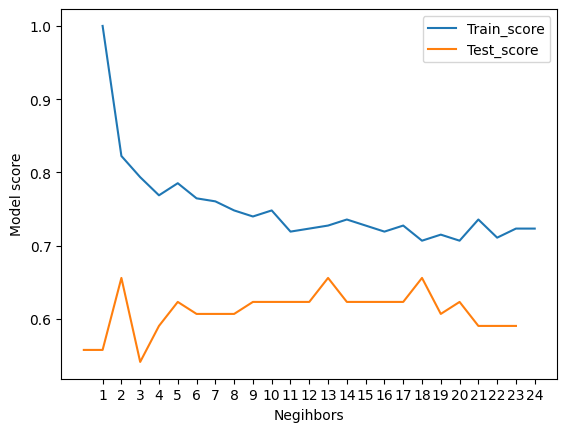

In [66]:
plt.plot(range(1,25),train_score,test_score)
plt.legend(["Train_score","Test_score"])
plt.xticks(range(1,25));
plt.xlabel("Negihbors")
plt.ylabel("Model score")
print(f"Maximum accuracy on test_score is {np.max(test_score)*100:.2f} %")

**As you can see in above plot model score is increasing as n_neighbors is increasing**
*   n_neighbors is hyperparameter
*   i have tuned this and got better accuracy

**Hyperparameter tuning by  `RandomizedSearchCV`**
*   we are going to tune
        1. LogisticRegression()
        2. RandomForestClassifier()
    using RandimizedSearchCV

In [67]:
LR_grid={
    "C": np.logspace(-4,4,10),
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
RF_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [ ]:
np.random.seed(17)
#tuning hyperparameter
RndSch_Log=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=LR_grid,
                              n_iter=20,
                               cv=5,
                              verbose=True)
RndSch_Log.fit(x_train,y_train);

In [69]:
#Best value of hyperparameter
RndSch_Log.best_params_

{'solver': 'lbfgs', 'C': 0.3593813663804626}

In [70]:
#Score of LogisticRegression model
RndSch_Log.score(x_test,y_test)

0.819672131147541

We have tuned logistic regression and now we will do this for `RandomForestClassifer`

In [72]:
np.random.seed(6)

#Tuning
RndSch_RF=RandomizedSearchCV( RandomForestClassifier(),
                             param_distributions=RF_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
RndSch_RF.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [73]:
#Best Parameter
RndSch_RF.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [74]:
RndSch_RF.score(x_test,y_test)

0.8032786885245902

**HyperParameter Tuning using GridSearchCV()**

1. Logistic Regression

In [75]:
#grid of logistic regression parameter
LR_grid={
    "C": np.logspace(-4,4,20),
    "solver":['liblinear']
}
mdl=GridSearchCV(LogisticRegression(),
                 param_grid=LR_grid,
                 cv=5,
                 verbose=True)
mdl.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [76]:
mdl.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [77]:
mdl.score(x_test,y_test)

0.819672131147541

2. RandomForestClassifier

In [78]:
RF_grid={
    "n_estimators":[10,110,210,310,410,500],
    "max_depth":[None,3,5,10]
}
mdl=GridSearchCV(RandomForestClassifier(),
                 param_grid=RF_grid,
                 cv=5,
                 verbose=True)
mdl.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'n_estimators': [10, 110, 210, 310, 410, 500]},
             verbose=True)

In [79]:
mdl.best_params_

{'max_depth': 5, 'n_estimators': 110}

In [80]:
mdl.score(x_test,y_test)

0.8032786885245902

Choose most accurate model and proceed further
*   LogisticRegression()

In [81]:
#let's go with LogisticRegression() RndSch_Log
y_preds=RndSch_Log.predict(x_test)
y_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [82]:
y_test

182    0
226    0
176    0
207    0
221    0
      ..
84     1
164    1
220    0
161    1
101    1
Name: target, Length: 61, dtype: int64

In [83]:
print(f"{(y_preds==y_test).sum()} is correct out of {len(y_test)}")

50 is correct out of 61


**ROC curve and AUC metric**

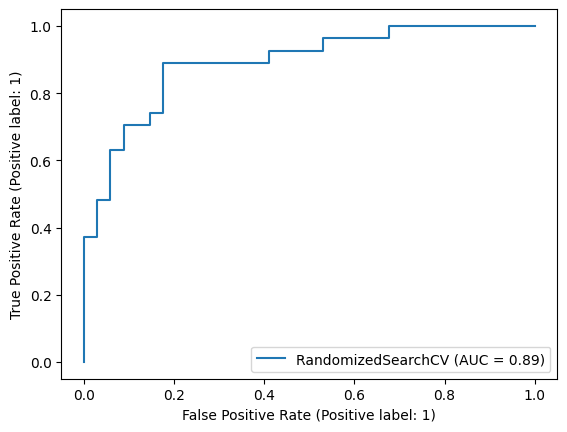

In [84]:
#plot roc curve and calculate it's auc metric
RocCurveDisplay.from_estimator(estimator=RndSch_Log,X=x_test,y=y_test)

**Confusion Matrix**

In [85]:
print(confusion_matrix(y_test,y_preds))

[[26  8]
 [ 3 24]]


Text(20.72222222222222, 0.5, 'Predicted Value')

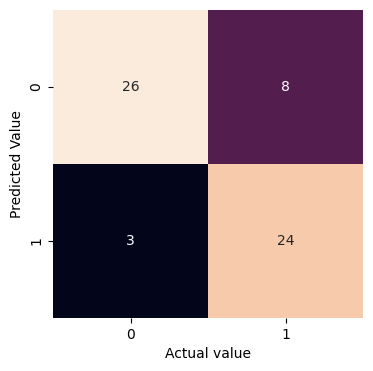

In [86]:
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")

**Classification Report**

In [87]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



**Feature Importance**
*  measure of feature's contribution which have contributed the most and least on a specific model

In [88]:
RndSch_Log.best_params_

{'solver': 'lbfgs', 'C': 0.3593813663804626}

In [89]:
clf=LogisticRegression(C=0.2976351441631313,solver='liblinear')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.819672131147541

In [90]:
#cofficient  of feature's contribution in increasing accuracy score
clf.coef_

array([[ 0.00732911, -1.18697488,  0.70865105, -0.02099668, -0.00436626,
        -0.05749014,  0.40934758,  0.0401784 , -0.60379127, -0.51542526,
         0.17921119, -0.68357421, -0.67668924]])

In [48]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
lst = list(heart_disease.columns.drop('target'))

In [50]:

lst

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [51]:
feature_imp=dict(zip(lst,clf.coef_[0]))
feature_imp

{'age': 0.021424135599874605,
 'sex': -1.0767077726576533,
 'cp': 0.7352031994749628,
 'trestbps': -0.022994612528190968,
 'chol': -0.0016966586187983782,
 'fbs': 0.3023188637602863,
 'restecg': 0.3206610253374526,
 'thalach': 0.03368310857406142,
 'exang': -0.6510334115496426,
 'oldpeak': -0.5553408677964466,
 'slope': 0.42203050508090334,
 'ca': -0.5945338431175439,
 'thal': -0.9680865737635571}

In [52]:
df=pd.DataFrame(feature_imp,index=[0])

<Axes: >

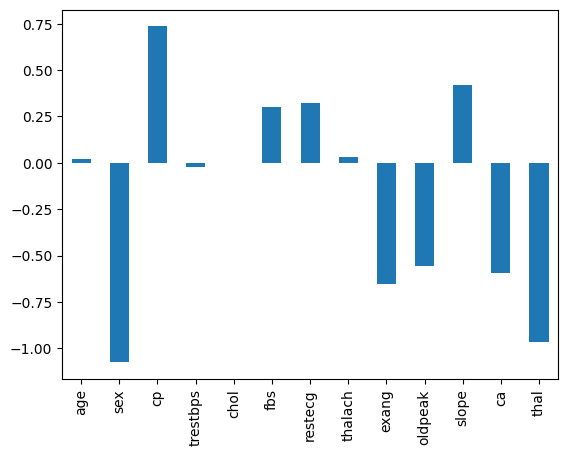

In [53]:
df.T.plot(kind='bar',legend=False)

cp is most contributed here(chest pain).......

In [57]:
np.random.randint(1,20)

7